## Question.
Find publicly available data for key factors that influence US home prices nationally. Then,
build a data science model that explains how these factors impacted home prices over the last 20
years. Use the S&P Case-Schiller Home Price Index as a proxy for home prices:
fred.stlouisfed.org/series/CSUSHPISA.



## Soultion - 
In this project, we embark on a data-driven journey to understand the key factors influencing home prices in the United States over the past two decades. By leveraging publicly available data and advanced data science techniques, our goal is to build a comprehensive model that sheds light on the intricate relationship between various factors and home prices.



## Libraries and Tools used:
Programming Languages: Python

Data Analysis Libraries: NumPy, pandas, matplotlib, seaborn

Machine Learning Libraries: scikit-learn

Data Visualization: Matplotlib, Seaborn

Version Control: Git, GitHub

Jupyter Notebooks for data exploration and analysis

# Datasheet Details and Features selection

All the Data has been collected from https://fred.stlouisfed.org/ with the filet selection of 20 years which is from 2003-2023.

Features which I find the most important factors influencing the house prices nationally are:

### Case-Shiller: 

Refers to the S&P CoreLogic Case-Shiller Home Price Indices.
Measures the changes in residential real estate prices across different regions in the United States.
Provides insights into housing market trends and price movements.

### Construction Price:

Represents the cost associated with building or constructing structures.
Includes expenses for materials, labor, equipment, and overhead.
Influences the overall cost of real estate development and construction projects.

### Consumer Price:

Measures the average change in prices paid by consumers for a basket of goods and services over time.
An important indicator of inflation and purchasing power.

### Housing Subsidies:

Refers to financial assistance provided by the government to support housing affordability.
Includes subsidies, grants, or tax credits aimed at helping individuals or families with housing costs.

### Interest Rates:

The cost of borrowing money, typically expressed as a percentage.
Influences mortgage rates and, consequently, the affordability of homes.
Central banks use interest rates as a tool to control inflation and economic activity.

### Per_Capita_GDP:

Gross Domestic Product (GDP) per capita, calculated by dividing the total GDP of a country by its population.
Provides a measure of the average economic output per person.
Indicates the standard of living and economic well-being of a population.

### Median Income:

The middle point of all incomes in a given area, where half of the population earns more, and half earns less.
Reflects the income distribution within a specific demographic or geographic area.

### Total Households:

The total number of occupied housing units in a specific area.
Important for understanding the demand for housing and related services.

### Unemployment Rate:

The percentage of the labor force that is unemployed and actively seeking employment.
A key economic indicator reflecting the health of the job market.

### Working Population:

The portion of the population that is either employed or actively seeking employment.
Essential for understanding the labor force's size and participation rate.

### Working Age (15-64):

The age range typically considered to be of working age.
Demographic category that influences the labor force and employment rates.

### Employment Rate:

The percentage of the working-age population that is employed.
Reflects the proportion of people within the working-age group who have jobs.

These factors collectively contribute to the dynamics of the real estate market, economic conditions, and the overall well-being of a population. Understanding these factors is crucial for policymakers, economists, and individuals involved in real estate and economic analysis.

# Steps

## Data Cleaning and Processing:
    
1-While Downloading the data, I found that in .CSV format, so the basic cleaning part I have done in the excel sheet.
eg, Changing the date formats and Features names. It saves a lot of my time cleaning in jupyter notebook.

2- I checked for the missing values as well as data types and converted date formats to float for smoot results.

3- Checked for outliers.

## Exploratory Data Analysis (EDA):

Conducted EDA to understand the distribution of variables, identify correlations, and visualize trends over time.

## Visualization:
Create visualizations to illustrate the relationships between actual and predicted home prices for each model.

Visualize the importance of different features or coefficients in influencing home prices.


## Model Selection:

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.

Model Training and Evaluation:
Trained each model using a subset of the data, evaluated performance using metrics such as Mean Squared Error (MSE) and R-squared.

## Feature Importance:
Analyzed feature importance for models like Random Forest, XGBoost, and Gradient Boosting to understand the factors influencing home prices.

## Model Comparison:
Compare the performance of different models based on metrics such as Mean Squared Error (MSE) and R-squared.

Select the best-performing model that provides accurate predictions and insights into the factors influencing home prices over the last 20 years.


## Conclusion:
Identified strong contender for the best model, considering their low MSE and high R-squared values.

Draw conclusions about the key factors that have historically influenced US home prices.


In [256]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
#Loading the data
df=pd.read_csv('C://Users/Lenovo/OneDrive/Desktop/Home_LLC/CASE-SCHILLER-Home-Price-Index.csv')
df.head()

,DATE,Year,Month,Case-Schiller,Construction Price,Consumer Price,Housing Subsides,Interest Rates,Per_Capita_gdp,median_income,Total_Households,Unemployement_rate,Working_Population,Working_age(15-64)_population,Employement_rate
0,2003-01-01,2003.0,1.0,128.461,144.4,182.6,25.93,1.24,50462.0,65860.0,111278.0,5.8,185635346.4,185635346.4,71.589831
1,2003-02-01,2003.0,2.0,129.355,145.2,183.6,25.93,1.26,NaN,65860.0,111278.0,5.9,185869692.3,185869692.3,71.521431
2,2003-03-01,2003.0,3.0,130.148,145.2,183.9,25.93,1.25,NaN,65860.0,111278.0,5.9,186085118.2,186085118.2,71.397567
3,2003-04-01,2003.0,4.0,130.884,145.9,183.2,25.93,1.26,50796.0,65860.0,111278.0,6.0,186470754.0,186470754.0,71.377392
4,2003-05-01,2003.0,5.0,131.735,145.8,182.9,25.93,1.26,NaN,65860.0,111278.0,6.1,186649078.0,186649078.0,71.213067


In [258]:
# Changing dtype of date column
df["DATE"] = pd.to_datetime(df["DATE"])

In [259]:
#Loading the data
df=pd.read_csv('C://Users/Lenovo/OneDrive/Desktop/Home_LLC/CASE-SCHILLER-Home-Price-Index.csv').set_index("DATE")
df.head()

,Year,Month,Case-Schiller,Construction Price,Consumer Price,Housing Subsides,Interest Rates,Per_Capita_gdp,median_income,Total_Households,Unemployement_rate,Working_Population,Working_age(15-64)_population,Employement_rate
DATE,,,,,,,,,,,,,,
2003-01-01,2003.0,1.0,128.461,144.4,182.6,25.93,1.24,50462.0,65860.0,111278.0,5.8,185635346.4,185635346.4,71.589831
2003-02-01,2003.0,2.0,129.355,145.2,183.6,25.93,1.26,NaN,65860.0,111278.0,5.9,185869692.3,185869692.3,71.521431
2003-03-01,2003.0,3.0,130.148,145.2,183.9,25.93,1.25,NaN,65860.0,111278.0,5.9,186085118.2,186085118.2,71.397567
2003-04-01,2003.0,4.0,130.884,145.9,183.2,25.93,1.26,50796.0,65860.0,111278.0,6.0,186470754.0,186470754.0,71.377392
2003-05-01,2003.0,5.0,131.735,145.8,182.9,25.93,1.26,NaN,65860.0,111278.0,6.1,186649078.0,186649078.0,71.213067


In [260]:
df.shape

(251, 14)

#### Note-Data consists of 14 columns and 21 rows.

In [261]:
df.dtypes

Year                             float64
Month                            float64
Case-Schiller                    float64
Construction Price               float64
Consumer Price                   float64
Housing Subsides                 float64
Interest Rates                   float64
Per_Capita_gdp                   float64
median_income                    float64
Total_Households                 float64
Unemployement_rate               float64
Working_Population               float64
Working_age(15-64)_population    float64
Employement_rate                 float64
dtype: object

#### Note-All the dtype is same as I changed the date format earlier.

Checking if any missing values?
Missing values can be a problem for linear models so checking if any columns have any missing values. If there are, those can be resolved during data cleaning .

Let's see what percentage of missing values are there for these columns

In [262]:
#Checking for missing data
df.isnull().sum()

Year                               2
Month                              2
Case-Schiller                      2
Construction Price                 2
Consumer Price                     2
Housing Subsides                  11
Interest Rates                     2
Per_Capita_gdp                   168
median_income                     11
Total_Households                   2
Unemployement_rate                 0
Working_Population                 1
Working_age(15-64)_population      1
Employement_rate                   1
dtype: int64

#### Observation:

The "Per_Capita_GDP" column has missing values because the data was quarterly. The missing values in the other columns are due to the unavailability of fresh data. We will first fill in the missing values in the "Per_Capita_GDP" column using linear interpolation. We will drop the rows with missing values in the other columns. This means that we will use data from 2003 to 2023.

Interpolation:

Interpolation is a mathematical technique used to estimate values that are missing in a dataset based on the values of neighboring data points. It calculates intermediate values based on the existing data.

In [263]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["Per_Capita_gdp"] = df["Per_Capita_gdp"].interpolate()

In [264]:
#Checking for missing data
df.isnull().sum()

Year                              2
Month                             2
Case-Schiller                     2
Construction Price                2
Consumer Price                    2
Housing Subsides                 11
Interest Rates                    2
Per_Capita_gdp                    0
median_income                    11
Total_Households                  2
Unemployement_rate                0
Working_Population                1
Working_age(15-64)_population     1
Employement_rate                  1
dtype: int64

In [265]:
df.dropna(inplace = True)

In [266]:
#Checking for missing data
df.isnull().sum()

Year                             0
Month                            0
Case-Schiller                    0
Construction Price               0
Consumer Price                   0
Housing Subsides                 0
Interest Rates                   0
Per_Capita_gdp                   0
median_income                    0
Total_Households                 0
Unemployement_rate               0
Working_Population               0
Working_age(15-64)_population    0
Employement_rate                 0
dtype: int64

#### Note- All the Missing Values are cleaned and data have no missing values now.

In [267]:
df

,Year,Month,Case-Schiller,Construction Price,Consumer Price,Housing Subsides,Interest Rates,Per_Capita_gdp,median_income,Total_Households,Unemployement_rate,Working_Population,Working_age(15-64)_population,Employement_rate
DATE,,,,,,,,,,,,,,
2003-01-01,2003.0,1.0,128.461,144.400,182.600,25.930,1.24,50462.000000,65860.0,111278.0,5.8,185635346.4,185635346.4,71.589831
2003-02-01,2003.0,2.0,129.355,145.200,183.600,25.930,1.26,50573.333333,65860.0,111278.0,5.9,185869692.3,185869692.3,71.521431
2003-03-01,2003.0,3.0,130.148,145.200,183.900,25.930,1.25,50684.666667,65860.0,111278.0,5.9,186085118.2,186085118.2,71.397567
2003-04-01,2003.0,4.0,130.884,145.900,183.200,25.930,1.26,50796.000000,65860.0,111278.0,6.0,186470754.0,186470754.0,71.377392
2003-05-01,2003.0,5.0,131.735,145.800,182.900,25.930,1.26,51034.666667,65860.0,111278.0,6.1,186649078.0,186649078.0,71.213067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2022.0,8.0,301.473,342.753,295.320,48.021,2.33,65569.000000,74580.0,131202.0,3.7,207370651.0,207370651.0,71.452559
2022-09-01,2022.0,9.0,299.353,336.464,296.539,48.021,2.56,65676.000000,74580.0,131202.0,3.5,207453580.5,207453580.5,71.418877
2022-10-01,2022.0,10.0,298.873,333.796,297.987,48.021,3.08,65783.000000,74580.0,131202.0,3.7,207431164.7,207431164.7,71.273773


#### Note-
Checking if there are any duplicated records
Here we are searching for observations which are completely identical. 

In [268]:
print("# of duplicated records :",df.duplicated().sum())

# of duplicated records : 0


In [269]:
df.describe()

,Year,Month,Case-Schiller,Construction Price,Consumer Price,Housing Subsides,Interest Rates,Per_Capita_gdp,median_income,Total_Households,Unemployement_rate,Working_Population,Working_age(15-64)_population,Employement_rate
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,2.400000e+02,2.400000e+02,240.000000
mean,2012.500000,6.500000,180.657237,212.851467,230.023113,34.677450,1.301625,57387.329167,68924.500000,121344.45000,6.012083,2.001512e+08,2.001512e+08,69.498226
std,5.778332,3.459267,41.254187,44.566715,27.475017,6.006483,1.578512,3978.027413,4574.810209,6113.86894,2.034118,6.171480e+06,6.171480e+06,2.056154
min,2003.000000,1.000000,128.461000,144.400000,182.600000,25.930000,0.050000,50462.000000,63350.000000,111278.00000,3.500000,1.856353e+08,1.856353e+08,60.193856
25%,2007.750000,3.750000,148.123000,184.275000,211.433250,29.785000,0.120000,54450.416667,65755.000000,116590.00000,4.575000,1.962127e+08,1.962127e+08,67.695999
50%,2012.500000,6.500000,172.495000,207.450000,231.658500,33.544500,0.400000,55858.000000,67150.000000,121771.50000,5.400000,2.018248e+08,2.018248e+08,70.049011
75%,2017.250000,9.250000,197.457750,224.525000,248.068500,37.877250,2.000000,60370.083333,72325.000000,126564.50000,7.350000,2.055396e+08,2.055396e+08,71.268593
max,2022.000000,12.000000,304.724000,353.015000,298.990000,48.021000,5.260000,65979.666667,78250.000000,131202.00000,14.700000,2.075245e+08,2.075245e+08,72.325478


In [270]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

# Exploratory Data Analysis (EDA)

Calculate and display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values. This gives you an overview of the data's central tendencies and variability.

In [271]:
df.describe()

,Case-Schiller,Construction Price,Consumer Price,Housing Subsides,Interest Rates,Per_Capita_gdp,median_income,Total_Households,Unemployement_rate,Working_Population,Working_age(15-64)_population,Employement_rate
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,2.400000e+02,2.400000e+02,240.000000
mean,180.657237,212.851467,230.023113,34.677450,1.301625,57387.329167,68924.500000,121344.45000,6.012083,2.001512e+08,2.001512e+08,69.498226
std,41.254187,44.566715,27.475017,6.006483,1.578512,3978.027413,4574.810209,6113.86894,2.034118,6.171480e+06,6.171480e+06,2.056154
min,128.461000,144.400000,182.600000,25.930000,0.050000,50462.000000,63350.000000,111278.00000,3.500000,1.856353e+08,1.856353e+08,60.193856
25%,148.123000,184.275000,211.433250,29.785000,0.120000,54450.416667,65755.000000,116590.00000,4.575000,1.962127e+08,1.962127e+08,67.695999
50%,172.495000,207.450000,231.658500,33.544500,0.400000,55858.000000,67150.000000,121771.50000,5.400000,2.018248e+08,2.018248e+08,70.049011
75%,197.457750,224.525000,248.068500,37.877250,2.000000,60370.083333,72325.000000,126564.50000,7.350000,2.055396e+08,2.055396e+08,71.268593
max,304.724000,353.015000,298.990000,48.021000,5.260000,65979.666667,78250.000000,131202.00000,14.700000,2.075245e+08,2.075245e+08,72.325478


### Correlation Analysis:
Calculate the correlation matrix to measure the linear relationships between variables.

In [272]:
# Correlation
df_new = df.corr()
df_new

,Case-Schiller,Construction Price,Consumer Price,Housing Subsides,Interest Rates,Per_Capita_gdp,median_income,Total_Households,Unemployement_rate,Working_Population,Working_age(15-64)_population,Employement_rate
Case-Schiller,1.000000,0.888824,0.803227,0.828896,0.135219,0.895484,0.834167,0.720504,-0.505809,0.570382,0.570382,0.295054
Construction Price,0.888824,1.000000,0.944249,0.929301,-0.221350,0.908312,0.680046,0.859014,-0.269647,0.770678,0.770678,-0.032869
Consumer Price,0.803227,0.944249,1.000000,0.967032,-0.306621,0.939311,0.718346,0.970690,-0.222508,0.920915,0.920915,-0.159769
Housing Subsides,0.828896,0.929301,0.967032,1.000000,-0.319337,0.921210,0.779129,0.937864,-0.156554,0.857725,0.857725,-0.175673
Interest Rates,0.135219,-0.221350,-0.306621,-0.319337,1.000000,-0.092666,0.089784,-0.348477,-0.513716,-0.386309,-0.386309,0.719502
Per_Capita_gdp,0.895484,0.908312,0.939311,0.921210,-0.092666,1.000000,0.861574,0.928117,-0.470495,0.831888,0.831888,0.108428
median_income,0.834167,0.680046,0.718346,0.779129,0.089784,0.861574,1.000000,0.743596,-0.498487,0.596736,0.596736,0.276896
Total_Households,0.720504,0.859014,0.970690,0.937864,-0.348477,0.928117,0.743596,1.000000,-0.239414,0.961032,0.961032,-0.188748
Unemployement_rate,-0.505809,-0.269647,-0.222508,-0.156554,-0.513716,-0.470495,-0.498487,-0.239414,1.000000,-0.111089,-0.111089,-0.870362
Working_Population,0.570382,0.770678,0.920915,0.857725,-0.386309,0.831888,0.596736,0.961032,-0.111089,1.000000,1.000000,-0.326863


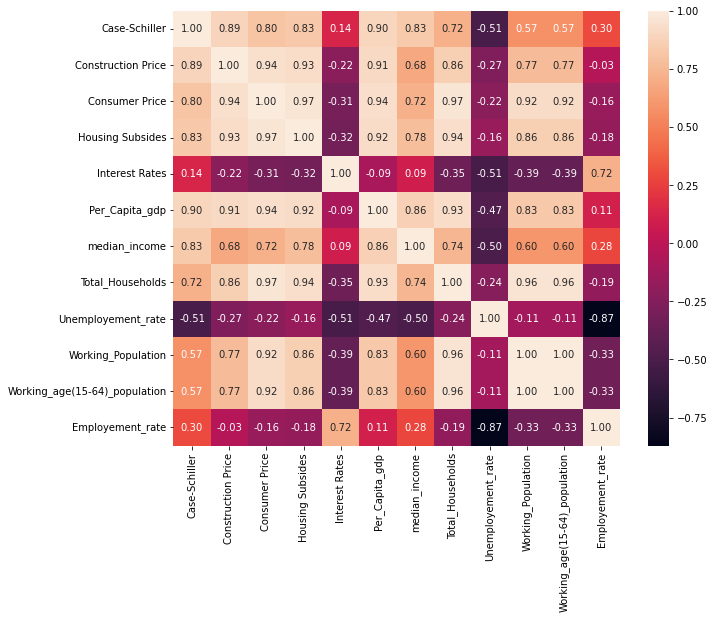

In [273]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_new, annot=True, fmt=".2f")
plt.show()

# Data Visualization

Visualize the data using various plots and graphs to understand its distribution and trends.

Pairplot for visualizing relationships

In [274]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

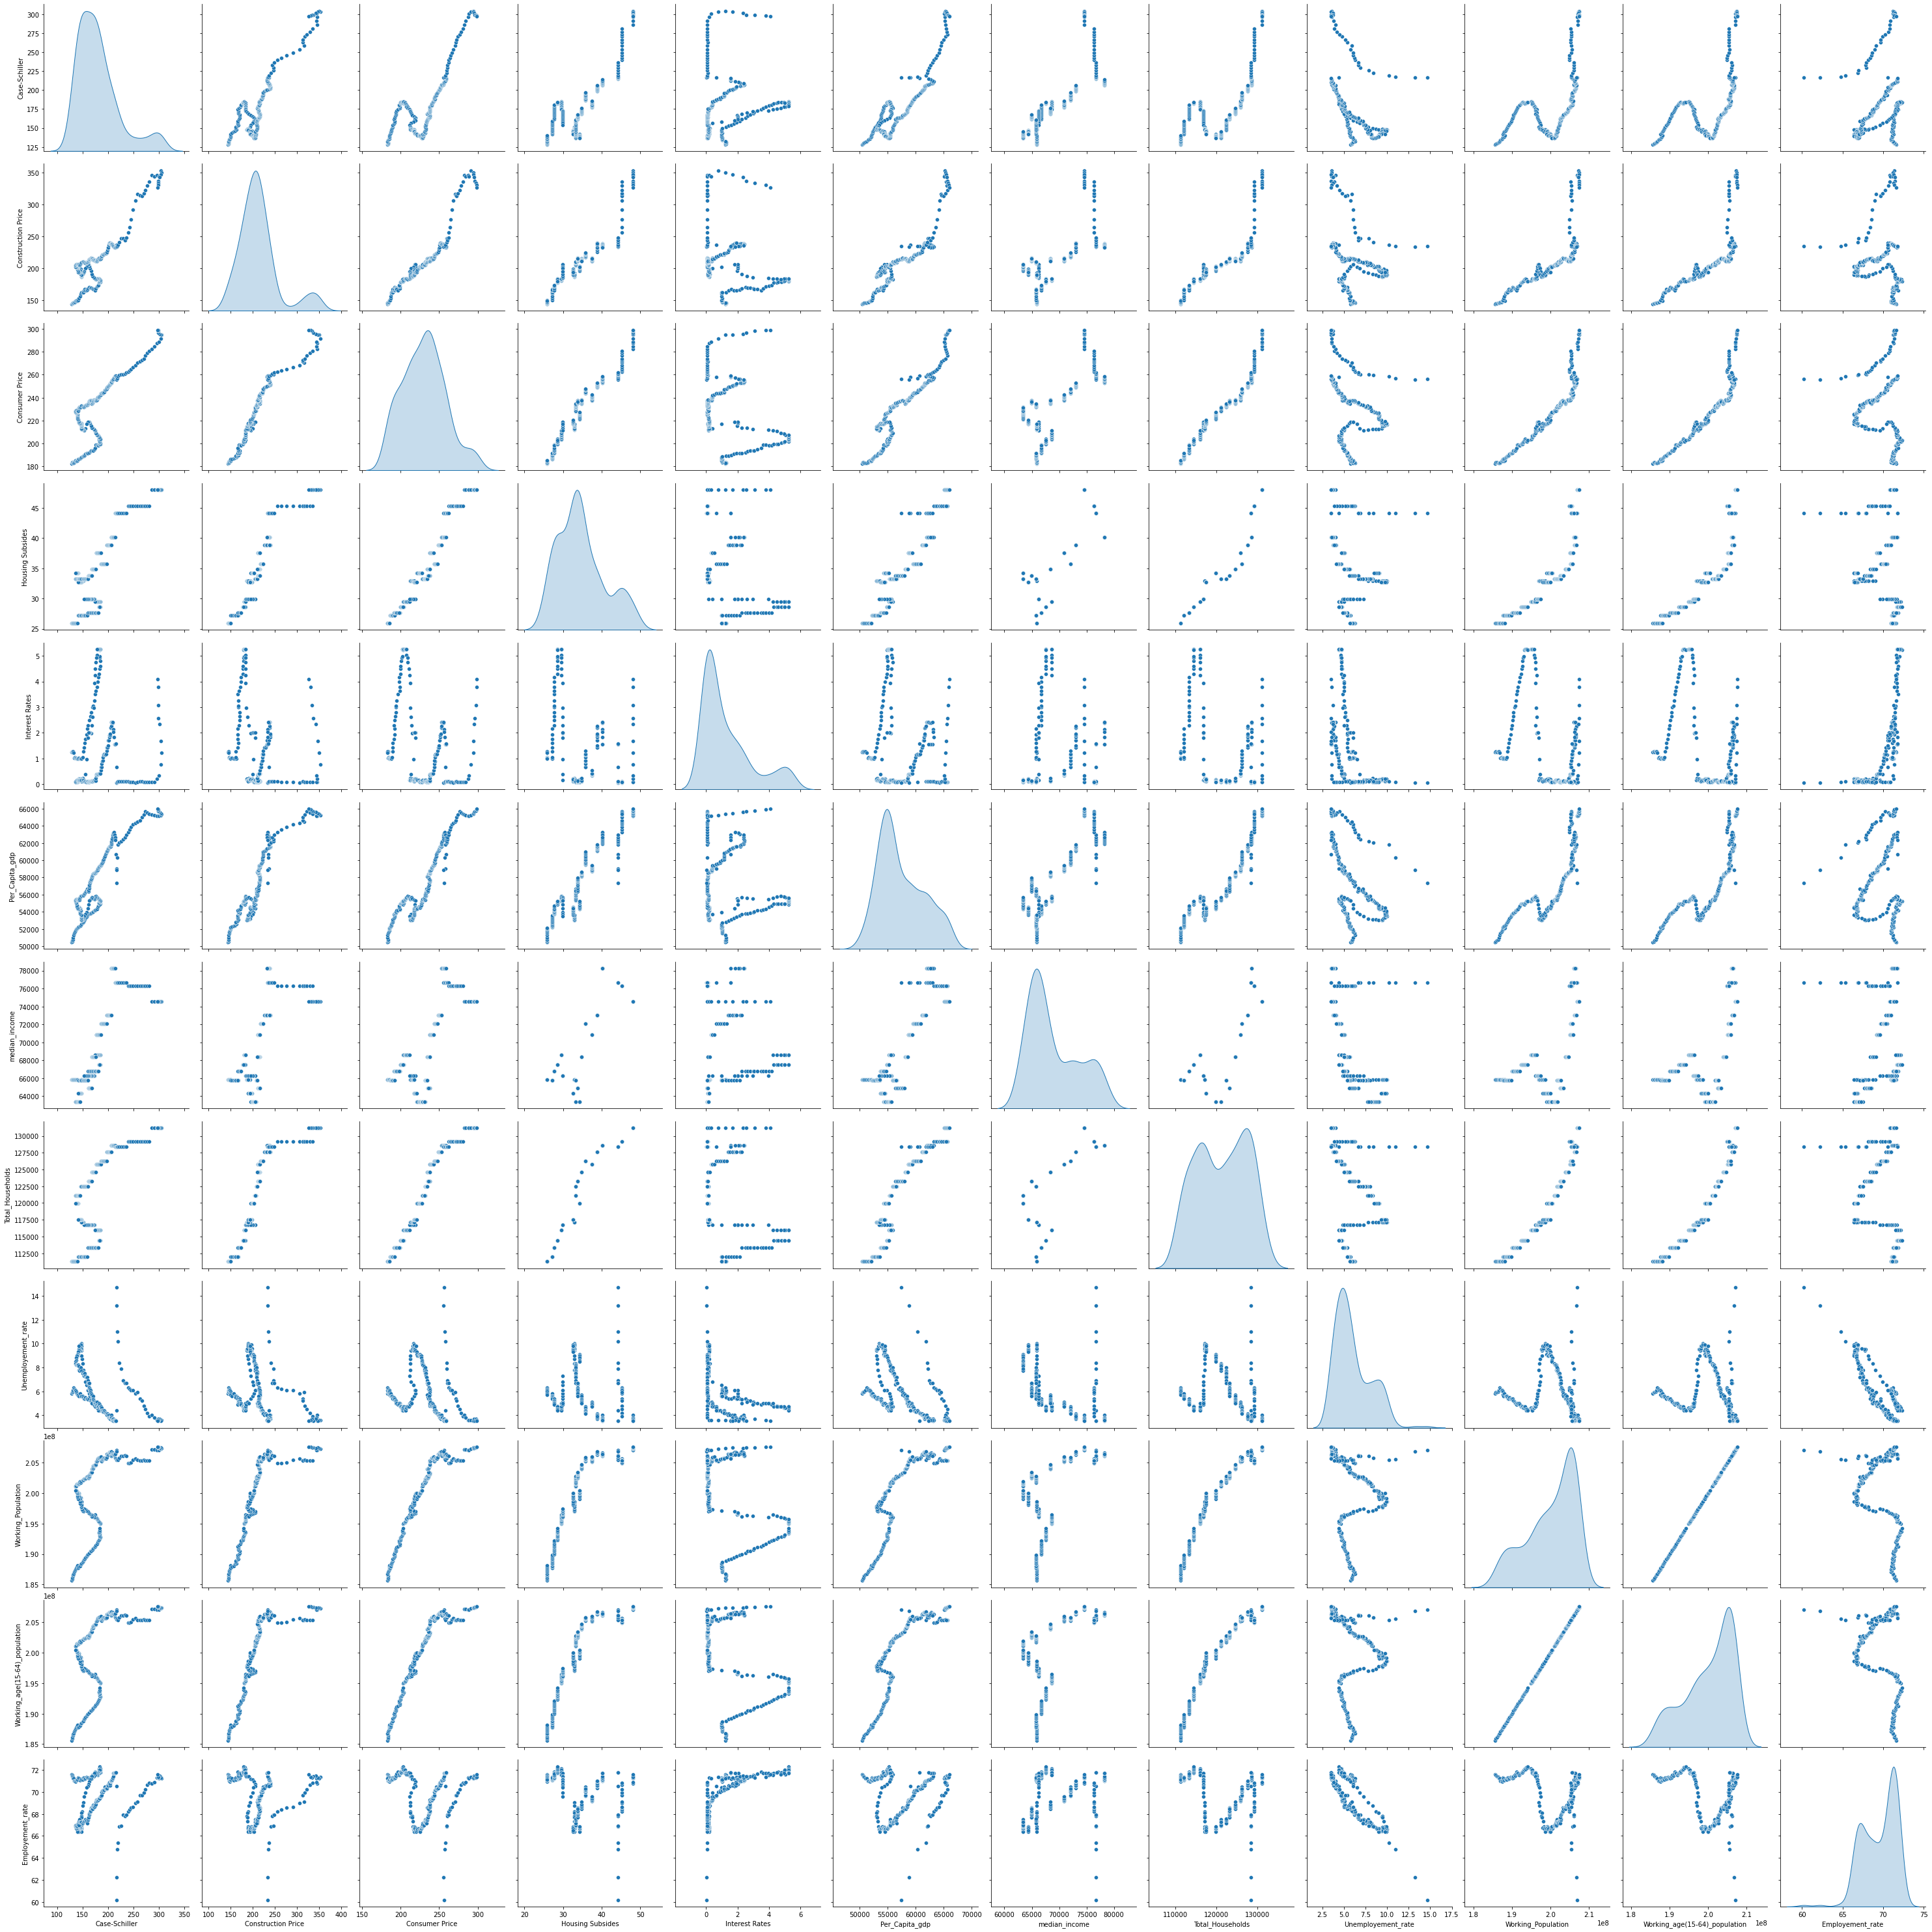

In [275]:
#Plotting pairplot for transmission
sns.pairplot(df,diag_kind = "kde",kind = "scatter",height=3.5) 
plt.show()

# Plotting density plot for all the numerical features

<Figure size 864x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

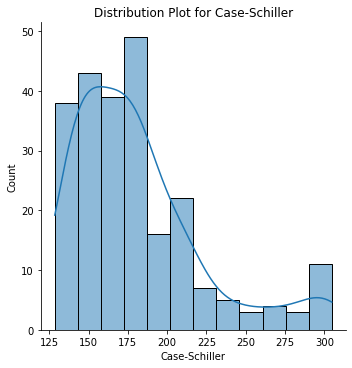

<Figure size 432x288 with 0 Axes>

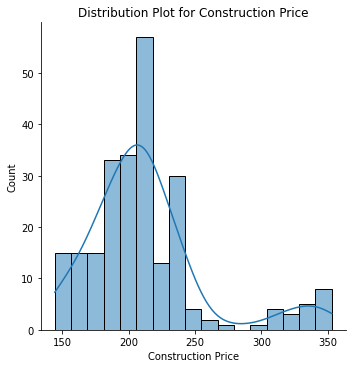

<Figure size 432x288 with 0 Axes>

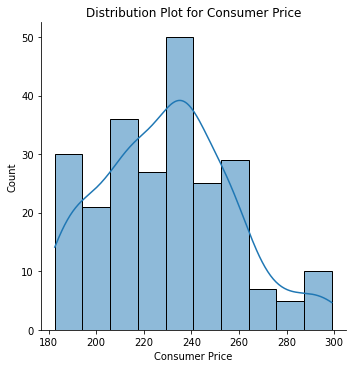

<Figure size 432x288 with 0 Axes>

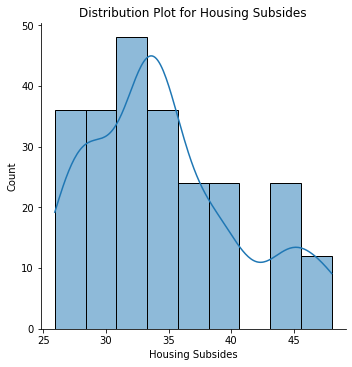

<Figure size 432x288 with 0 Axes>

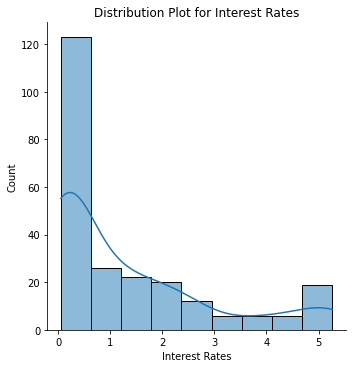

<Figure size 432x288 with 0 Axes>

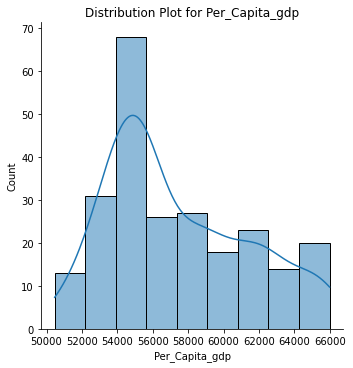

<Figure size 432x288 with 0 Axes>

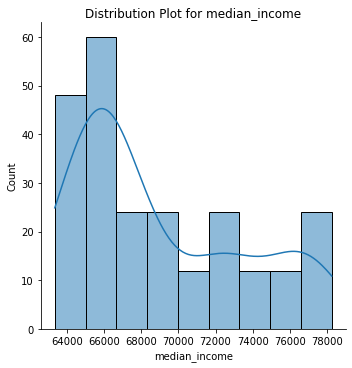

<Figure size 432x288 with 0 Axes>

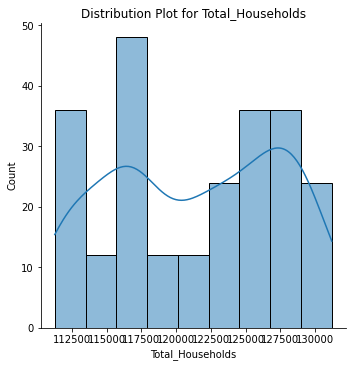

<Figure size 432x288 with 0 Axes>

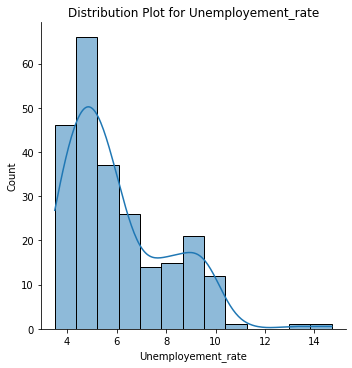

<Figure size 432x288 with 0 Axes>

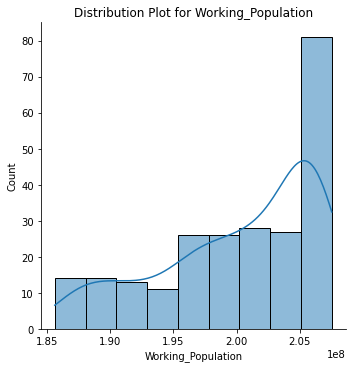

<Figure size 432x288 with 0 Axes>

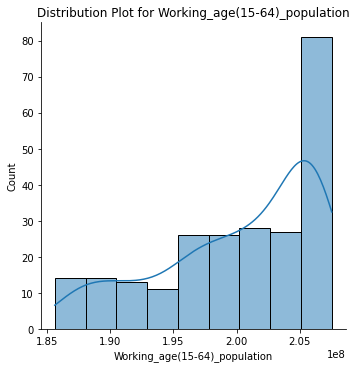

<Figure size 432x288 with 0 Axes>

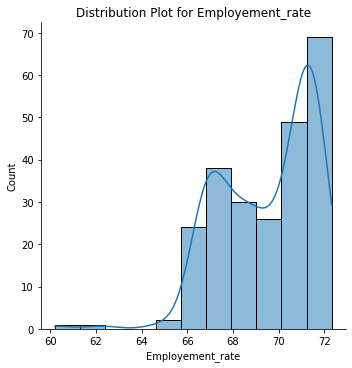

In [276]:
plt.figure(figsize=(12, 6))
for col in df.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.displot(data=df, x=col, kde =True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')
    plt.show()
     

#### Time Series Analysis:
For time-dependent variables like 'CSUSHPISA,' use time series decomposition to separate trends, seasonality, and residuals. Plot these components to understand the patterns over tim

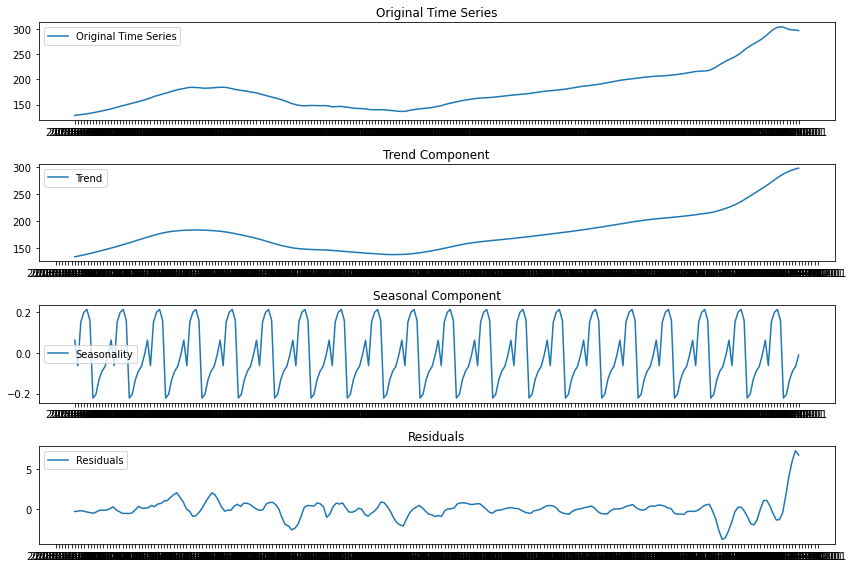

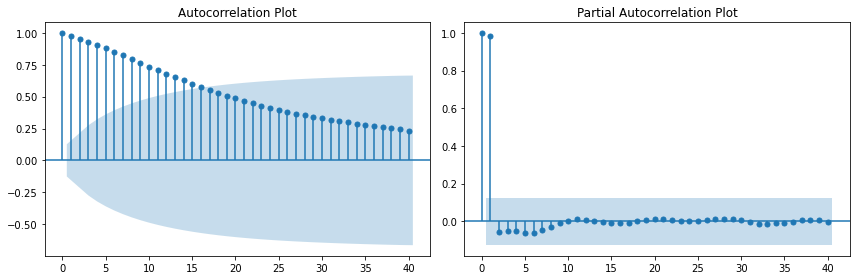

In [277]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(df['Case-Schiller'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Case-Schiller'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(df['Case-Schiller'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(df['Case-Schiller'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

The trend component represents the overall trend in home prices.

The seasonal component captures any recurring patterns or seasonality.

The residual component accounts for the remaining variability in the data.

In [278]:
df.columns

Index(['Case-Schiller', 'Construction Price', 'Consumer Price',
       'Housing Subsides', 'Interest Rates', 'Per_Capita_gdp', 'median_income',
       'Total_Households', 'Unemployement_rate', 'Working_Population',
       'Working_age(15-64)_population', 'Employement_rate'],
      dtype='object')

In [281]:
Features=['Case-Schiller','Construction Price','Consumer Price','Housing Subsides','Interest Rates','Per_Capita_gdp','median_income','Total_Households','Unemployement_rate','Working_Population','Working_age(15-64)_population','Employement_rate']

<Figure size 936x576 with 0 Axes>

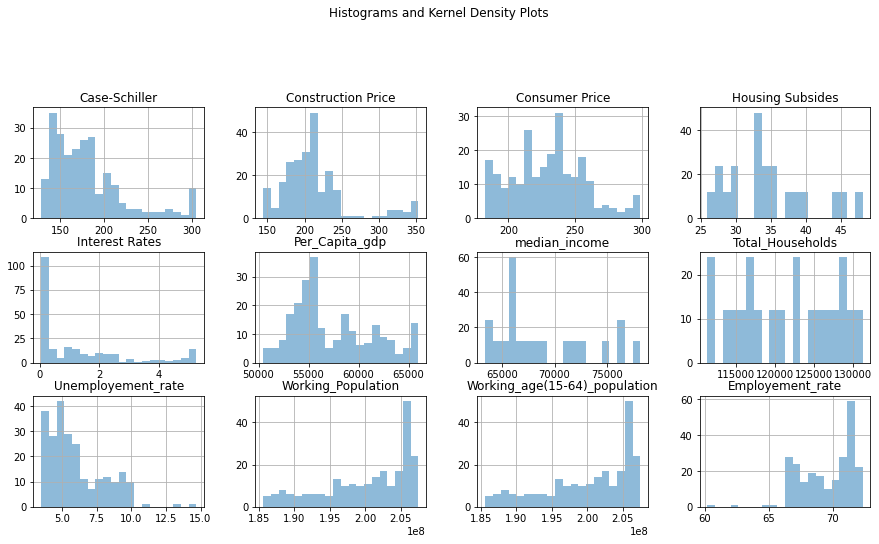

In [282]:
plt.figure(figsize=(13, 8))
df[Features].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

### Plotting boxplot for analyzing the outliers in the data

<Figure size 864x432 with 0 Axes>

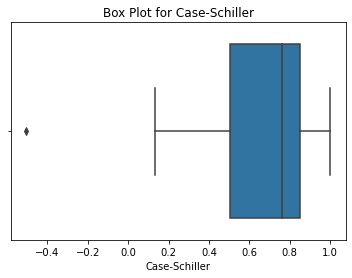

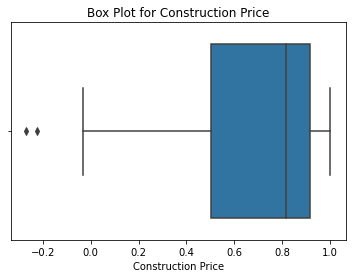

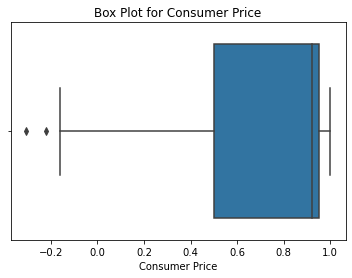

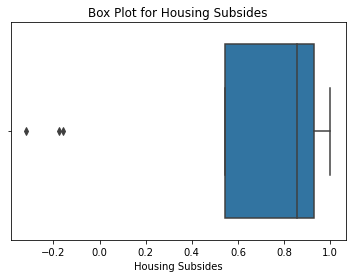

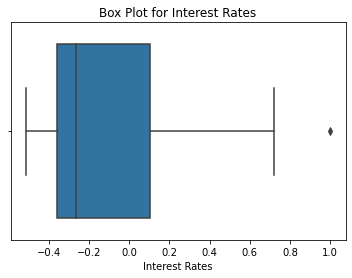

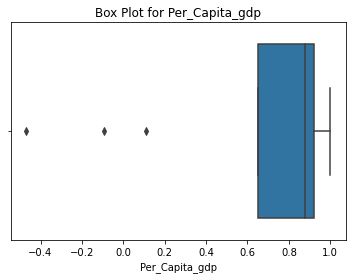

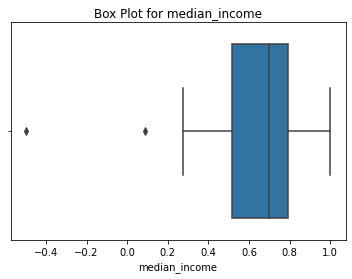

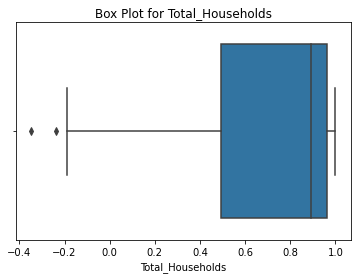

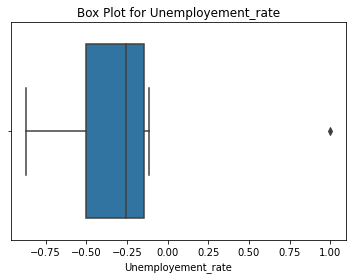

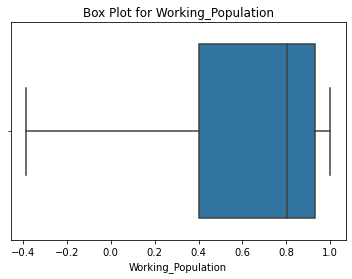

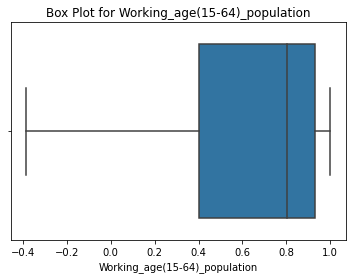

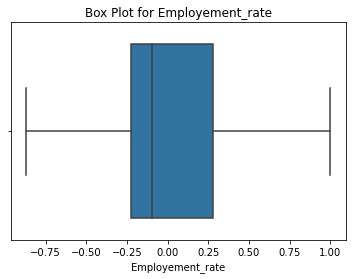

In [283]:

plt.figure(figsize=(12, 6))
for col in df_new.columns.tolist():
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_new, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()


As checked, we can see some outliers in the visualizayion, and we will now check the outliers are need to be cleaned or there is no harm with that much of outliers.

The features we can see the outliers are- 
'Case-Schiller',
'Construction Price',
'Consumer Price',
'Interest Rates',
'Per_Capita_gdp'


# Treating Skewness and Outliers:

In [284]:
df_new['Case-Schiller'].skew()

-1.7252300801667348

In [285]:
df_new['Construction Price'].skew()

-1.2479647480966125

In [286]:
df_new['Consumer Price'].skew()

-1.260153423439675

In [287]:
df_new['Interest Rates'].skew()

1.4513216684409416

In [288]:
df_new['Per_Capita_gdp'].skew()

-1.5491205538956356

No Outliers found , so no need to treat it.

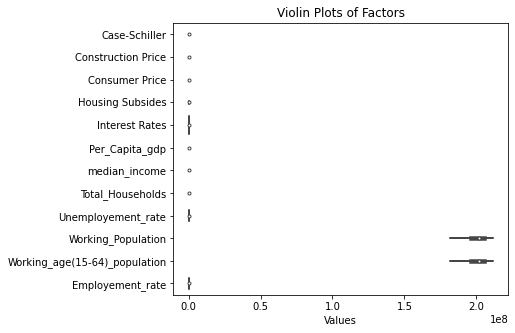

In [289]:
# Violin Plots
plt.figure(figsize=(6, 5))
sns.violinplot(data=df[Features], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

Extract features and target

In [290]:
# Separating the target variable and the independent variable
y = df.pop("Case-Schiller")
X = df

Plotting scatter plots of the CASE-SHILLER index vs features

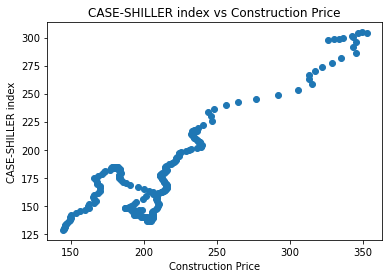

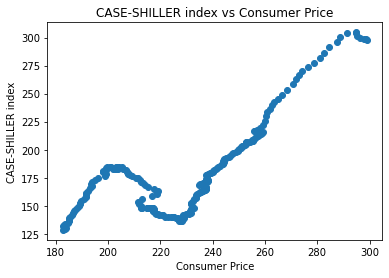

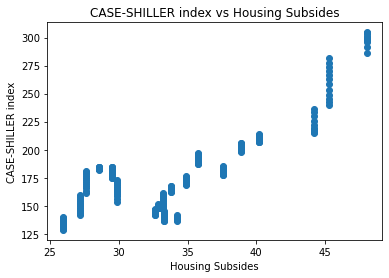

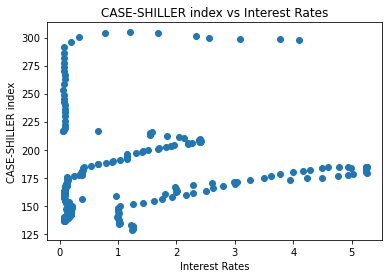

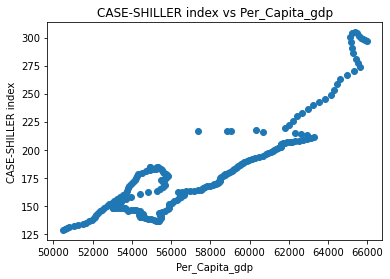

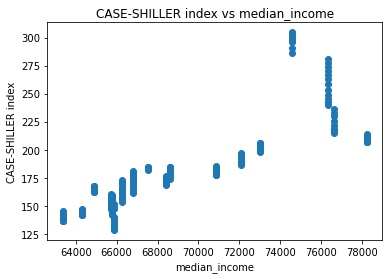

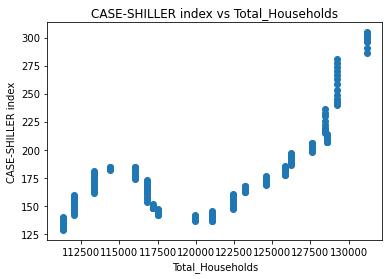

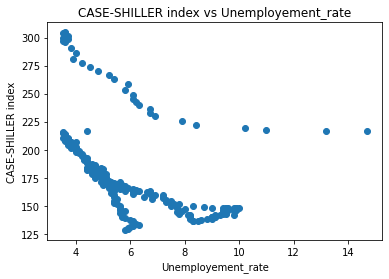

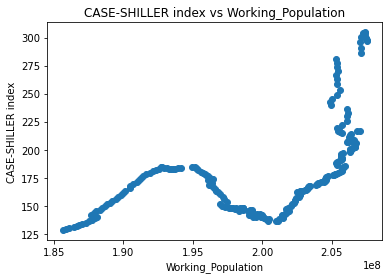

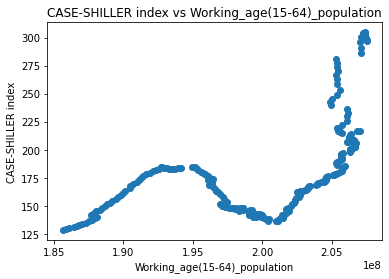

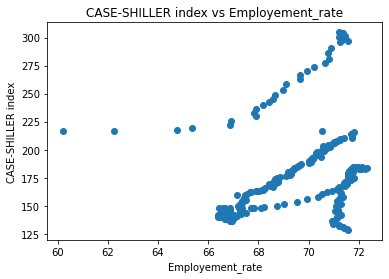

In [291]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

# Calculate correlation coefficients

In [292]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Interest Rates                   0.135219
Employement_rate                 0.295054
Unemployement_rate               0.505809
Working_Population               0.570382
Working_age(15-64)_population    0.570382
Total_Households                 0.720504
Consumer Price                   0.803227
Housing Subsides                 0.828896
median_income                    0.834167
Construction Price               0.888824
Per_Capita_gdp                   0.895484
dtype: float64


### Based on the provided correlation coefficients:

#### Highest Correlation:

The variable with the highest correlation with the target variable ('Case-Schiller) is 'Per_Capita_GDP' with a correlation coefficient of  0.8954845. This feature shows a strong positive linear relationship with home prices.

#### Other Strong Correlations:

'Construction Price' (0.888824), 'median_income' (0.834167), 'Housing Subsides' (0.828896) and 'Consumer Price' (0.803227) also have strong positive correlations.

#### Moderate Correlations:

'Total_Households' (0.7205042) has moderate positive correlations.

Lower Correlations:

'Interest Rates' (0.135219), 'Employement_rate' (0.295054), 'Unemployement_rate (0.505809), and 'Working_Population' (0.570382) have lower correlations.

# Data Modelling

In [293]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

We will drop the columns which has lower correlation with the target.

In [295]:
mult_cols = ['Working_Population','Interest Rates','Unemployement_rate', 'Employement_rate']
df.drop(columns = mult_cols, inplace = True)
X = df

# Models building

In [296]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [297]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Explored various regression models, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, Support Vector Regression (SVR), and XGBoost.

In [299]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 67.67340964966395
R-squared: 0.9716901433979442
Coefficients:
Construction Price: 20.680974431711483
Consumer Price: 10.796316333826251
Housing Subsides: 1.3280624599436481
Per_Capita_gdp: 26.140889870780207
median_income: 13.94230854656797
Total_Households: -32.1779480181388
Working_age(15-64)_population: -4.459635090948875
Intercept: 179.7899687499999

Model: ElasticNet
Mean Squared Error: 338.7242448913194
R-squared: 0.8583012907114472
Coefficients:
Construction Price: 9.766573108353047
Consumer Price: 3.170963030797105
Housing Subsides: 4.227759024283413
Per_Capita_gdp: 8.463830203158809
median_income: 9.748514727968074
Total_Households: 0.0
Working_age(15-64)_population: -3.064249034009936
Intercept: 179.78996874999996

Model: Random Forest
Mean Squared Error: 4.867419242162478
R-squared: 0.9979638096930381
Feature Importance Analysis:
Construction Price: 0.26935475719214524
Consumer Price: 0.3638903955992437
Housing Subsides: 0.0834733

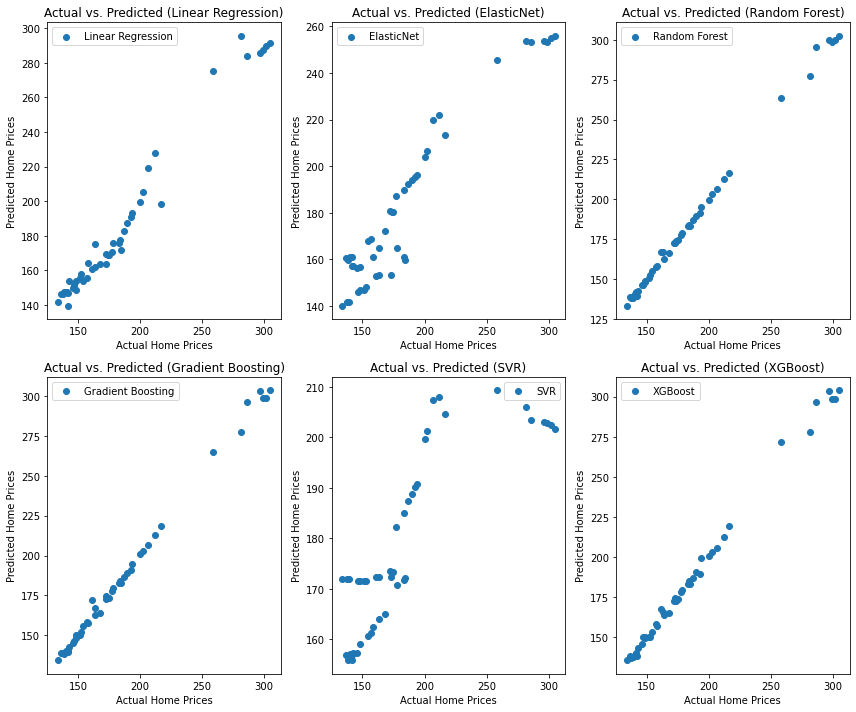


Best Model: RandomForestRegressor with MSE: 4.867419242162478


In [300]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

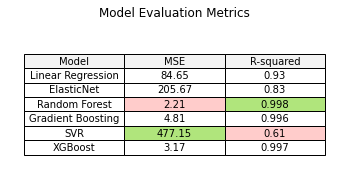

In [301]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

# Decision:

Random Forest and XGBoost appear to be strong contenders, as they have low MSE and high R-squared values. Additionally, both models provide insights into feature importance.

Gradient Boosting also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

Linear Regression and ElasticNet have higher MSE values, indicating potential limitations in predictive accuracy.

SVR has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

Champion model: In summary, based on the provided metrics, Random Forest appear to be a strong candidate for the best model, with a low MSE and a high R-squared value.

Low MSE: The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.

High R-squared: The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.

Feature Importance: The feature importance analysis provides transparency into the factors driving the predictions. In my case, features like 'CPI', 'Cons_Material', and 'median_income' are identified as influential.

This means that, according to the model, changes in these features have a notable impact on the predictions of U.S. home prices. For example, if 'CPI' increases, it suggests that changes in the cost of living might influence home prices.

Understanding feature importance is crucial for making informed decisions, refining models, and gaining insights into the factors driving the predictions, which is especially valuable in fields like economics, finance, or real estate where interpretability is essential.